## Predicting Insurance Premiums

In [1]:
#Initial imports
import pandas as pd
from path import Path
import tensorflow as tf
import hvplot.pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Set a random seed for TensorFlow to allow reproducible testing results
tf.random.set_seed(126)

In [ ]:
#Read in the insurance premium data
file_path = Path("./Resources/Updated_Project_Data.csv")
InsuranceData_df = pd.read_csv(file_path)
InsuranceData_df = InsuranceData_df.dropna()
InsuranceData_df = InsuranceData_df.drop(columns=['DOT','Legal_Name','Business_State'])
InsuranceData_df.columns


Index(['business_county', 'County ', 'ISS', 'Years_In_Business',
       'Number Of Trucks ', 'Yearly Premium'],
      dtype='object')

In [ ]:
InsuranceData_df = InsuranceData_df.loc[(InsuranceData_df['Number Of Trucks '] <= 100)]
#df.loc[(df['Discount'] >= 1000) & (df['Discount'] <= 2000)]
InsuranceData_df.head()

,business_county,County,ISS,Years_In_Business,Number Of Trucks,Yearly Premium
0,SEMINOLE,Normal,100.00,1.00,8.00,122500
1,SAINT JOHNS,Normal,100.00,1.00,8.00,122500
2,COLUMBIA,Normal,100.00,3.00,5.00,87500
3,SEMINOLE,Normal,100.00,22.00,4.00,68500
4,MIAMI-DADE,High Risk,100.00,3.00,2.00,39000


In [ ]:
InsuranceData_df['Yearly Premium'].describe()
InsuranceData_df.sort_values(by="Yearly Premium",inplace=True,ascending=False)
InsuranceData_df.head()


,business_county,County,ISS,Years_In_Business,Number Of Trucks,Yearly Premium
423,DUVAL,Normal,73.00,21.00,92.00,1380500
223,DUVAL,Normal,85.00,29.00,91.00,1365500
96,MIAMI-DADE,High Risk,94.00,29.00,90.00,1353000
265,DUVAL,Normal,82.00,14.00,90.00,1350500
266,DUVAL,Normal,82.00,14.00,90.00,1350500


### PCA Weight the Features

In [ ]:
#Get the Encoded Data from the original dataframe
InsuranceData_df_encoded = pd.get_dummies(InsuranceData_df)
feature_data_df = InsuranceData_df_encoded.drop(columns=['Yearly Premium'])
feature_data_df.head()

,ISS,Years_In_Business,Number Of Trucks,business_county_ALACHUA,business_county_ASHLAND,business_county_BAKER,business_county_BAY,business_county_BELKNAP,business_county_BERRIEN,business_county_BEXAR,...,business_county_WAKULLA,business_county_WASCO,business_county_WASHINGTON,business_county_WAYNE,business_county_WEBB,business_county_WILLIAMSON,business_county_WYANDOTTE,business_county_YORK,County _High Risk,County _Normal
423,73.00,21.00,92.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
223,85.00,29.00,91.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
96,94.00,29.00,90.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
265,82.00,14.00,90.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
266,82.00,14.00,90.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# set the PCA instance and declare the number of PCA variables
pca=PCA(n_components=10)

In [ ]:
# fit the PCA model on the transformed InsuranceData Dataframe
insurance_pca = pca.fit_transform(feature_data_df)

# reveiw the first 5 rows of the array of the features
insurance_pca[:5]

array([[ 4.24757255e+01,  8.02628095e+01, -2.15661587e+01,
        -1.01463168e-01, -9.06461580e-02, -3.51789560e-01,
        -4.86893991e-01, -2.92262977e-01,  2.50674261e-02,
         2.86254967e-02],
       [ 5.42484608e+01,  8.14682549e+01, -1.32628194e+01,
        -5.34238038e-02, -9.56826732e-02, -3.26909382e-01,
        -4.77217361e-01, -2.85866594e-01,  3.60725813e-02,
         2.88031231e-02],
       [ 6.30741188e+01,  7.96170431e+01, -1.23923903e+01,
         1.68690119e+00,  7.34031355e-02,  1.21544651e-01,
         2.41250727e-01,  8.51445338e-02, -5.90995313e-02,
         1.14231602e-02],
       [ 5.12092150e+01,  7.45917025e+01, -2.66213503e+01,
        -1.90937203e-01, -9.86479251e-02, -3.77669687e-01,
        -4.99087621e-01, -2.95230810e-01,  1.12542847e-02,
         2.56384217e-02],
       [ 5.12092150e+01,  7.45917025e+01, -2.66213503e+01,
        -1.90937203e-01, -9.86479251e-02, -3.77669687e-01,
        -4.99087621e-01, -2.95230810e-01,  1.12542847e-02,
         2.

In [ ]:
# Calculate the PCA explained variance ratio....this will determin if you have enough components to accurately explain the dataframe
# the higher the sum of the number the better...it will explain x% of the total variance of the dataframe condensed into the PCA variables
pca.explained_variance_ratio_

array([8.20031590e-01, 1.35459278e-01, 4.32816307e-02, 5.29420783e-04,
       8.38332070e-05, 6.99771416e-05, 5.97650923e-05, 4.94165118e-05,
       3.70698399e-05, 2.98243202e-05])

In [ ]:
# Create the PCA Dataframe
insurance_pca_df = pd.DataFrame(
    insurance_pca
)

# Review the PCA DataFrame
insurance_pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,42.48,80.26,-21.57,-0.10,-0.09,-0.35,-0.49,-0.29,0.03,0.03
1,54.25,81.47,-13.26,-0.05,-0.10,-0.33,-0.48,-0.29,0.04,0.03
2,63.07,79.62,-12.39,1.69,0.07,0.12,0.24,0.09,-0.06,0.01
3,51.21,74.59,-26.62,-0.19,-0.10,-0.38,-0.50,-0.30,0.01,0.03
4,51.21,74.59,-26.62,-0.19,-0.10,-0.38,-0.50,-0.30,0.01,0.03


In [ ]:
# Define the features data...aka the insurance premium feature inputs
# right now I am just setting up the framework for the data inputs...for our project the X data will be all values other than the insurance premium

#InsuranceData_df = InsuranceData_df[['County ','ISS', 'Years_In_Business', 'Number Of Trucks ', 'Yearly Premium']]
#InsuranceData_df_encoded = pd.get_dummies(InsuranceData_df)
#X = InsuranceData_df_encoded.drop(columns=['Yearly Premium', 'County _High Risk'])
X = insurance_pca_df


In [ ]:
# Define the target Data....aka the insurance premium
# right now I am just setting up the framework for the data inputs...for our project the y data will be the insurance premium
y = InsuranceData_df_encoded['Yearly Premium'].values

### Scale the Data for the Neural Network Model

In [ ]:
# Create the scaler instance and fit scaler with features data
#scaler = StandardScaler().fit(X)
# Scale the features data
#X = scaler.transform(X)

In [ ]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=126)

# Scale the training and testing input features using StandardScaler
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Creating our Neural Network Model

In [ ]:
# Create a shallow, 1 hidden layer, neural network
neural_n = Sequential()

# Hidden layer
neural_n.add(Dense(units=30, input_dim=10, activation="relu"))

# Output layer
neural_n.add(Dense(units=1, activation="linear"))

2022-06-28 20:11:37.742940: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Compile the model
neural_n.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.MeanSquaredError(name="mse"),tf.keras.metrics.MeanAbsolutePercentageError(name="mape")])

# Fit the model
model_1 = neural_n.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_split=0.30)

In [ ]:
# Fit the model
model_1 = neural_n.fit(X_train_scaled, y_train, epochs=250, verbose=2,validation_split=0.30)
#tf.reshape(x[-1])

Epoch 1/250
31/31 - 0s - loss: 32324632576.0000 - mse: 32324632576.0000 - mape: 69.8230 - val_loss: 24888956928.0000 - val_mse: 24888956928.0000 - val_mape: 70.6933 - 128ms/epoch - 4ms/step
Epoch 2/250
31/31 - 0s - loss: 32307369984.0000 - mse: 32307369984.0000 - mape: 69.7783 - val_loss: 24877801472.0000 - val_mse: 24877801472.0000 - val_mape: 70.6495 - 110ms/epoch - 4ms/step
Epoch 3/250
31/31 - 0s - loss: 32291164160.0000 - mse: 32291164160.0000 - mape: 69.7267 - val_loss: 24863483904.0000 - val_mse: 24863483904.0000 - val_mape: 70.5959 - 107ms/epoch - 3ms/step
Epoch 4/250
31/31 - 0s - loss: 32273098752.0000 - mse: 32273098752.0000 - mape: 69.6761 - val_loss: 24850618368.0000 - val_mse: 24850618368.0000 - val_mape: 70.5474 - 107ms/epoch - 3ms/step
Epoch 5/250
31/31 - 0s - loss: 32255635456.0000 - mse: 32255635456.0000 - mape: 69.6267 - val_loss: 24838854656.0000 - val_mse: 24838854656.0000 - val_mape: 70.5013 - 151ms/epoch - 5ms/step
Epoch 6/250
31/31 - 0s - loss: 32238931968.0000 - 

## Creating Second Neural Network Model

In [ ]:
# Define the model - deep neural network with two layers
nn_2 = Sequential()

# First hidden layer
nn_2.add(Dense(units=30, input_dim=10, activation="relu"))

# Second hidden layer
nn_2.add(Dense(units=20, activation="relu"))

# Output layer
nn_2.add(Dense(units=1, activation="linear"))

In [ ]:
# Compile the model
nn_2.compile(
    loss="mean_squared_error",
    optimizer="adam", 
    metrics=[
        tf.keras.metrics.MeanSquaredError(name="mse"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
     ],
)

In [ ]:
# Fit the model 
model_2 = nn_2.fit(X_train_scaled, y_train, epochs=250, verbose=2,validation_split=0.30)
#tf.reshape(x[-1])

Epoch 1/250
31/31 - 1s - loss: 2279404544.0000 - mse: 2279404544.0000 - mape: 96.6416 - val_loss: 2220874752.0000 - val_mse: 2220874752.0000 - val_mape: 92.5656 - 741ms/epoch - 24ms/step
Epoch 2/250
31/31 - 0s - loss: 2210066944.0000 - mse: 2210066944.0000 - mape: 95.7181 - val_loss: 2158646528.0000 - val_mse: 2158646528.0000 - val_mape: 91.6499 - 73ms/epoch - 2ms/step
Epoch 3/250
31/31 - 0s - loss: 2145699328.0000 - mse: 2145699328.0000 - mape: 94.9821 - val_loss: 2094556032.0000 - val_mse: 2094556032.0000 - val_mape: 91.0333 - 104ms/epoch - 3ms/step
Epoch 4/250
31/31 - 0s - loss: 2075983488.0000 - mse: 2075983488.0000 - mape: 94.0906 - val_loss: 2032641664.0000 - val_mse: 2032641664.0000 - val_mape: 90.1669 - 91ms/epoch - 3ms/step
Epoch 5/250
31/31 - 0s - loss: 2010302976.0000 - mse: 2010302976.0000 - mape: 93.1410 - val_loss: 1971077248.0000 - val_mse: 1971077248.0000 - val_mape: 89.2150 - 105ms/epoch - 3ms/step
Epoch 6/250
31/31 - 0s - loss: 1945859200.0000 - mse: 1945859200.0000 -

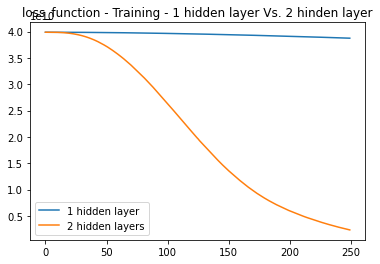

In [ ]:
# Plot the loss function of the training results for the two models
#image 1
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training - 1 hidden layer Vs. 2 hinden layer")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

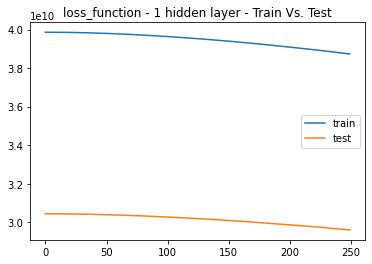

In [ ]:
# Plot train vs test for shallow net
#image 2
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - 1 hidden layer - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

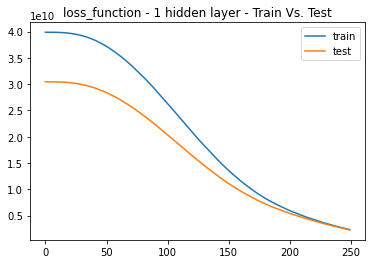

In [ ]:
# Plot train vs test for shallow net
#image 3
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - 1 hidden layer - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

In [ ]:
# Adding the Predictions onto the Original Datafram
InsuranceData_df['Predictions1'] = neural_n.predict(X_scaler.transform(X))
InsuranceData_df['Predictions2'] = nn_2.predict(X_scaler.transform(X))
InsuranceData_df.head()

59/59 [==============================] - 0s 960us/step


,business_county,County,ISS,Years_In_Business,Number Of Trucks,Yearly Premium,Predictions1,Predictions2
423,DUVAL,Normal,73.00,21.00,92.00,1380500,17039.66,1157532.75
223,DUVAL,Normal,85.00,29.00,91.00,1365500,16486.69,1120783.25
96,MIAMI-DADE,High Risk,94.00,29.00,90.00,1353000,17761.04,1126612.88
265,DUVAL,Normal,82.00,14.00,90.00,1350500,17563.73,1170699.00
266,DUVAL,Normal,82.00,14.00,90.00,1350500,17563.73,1170699.00


In [ ]:
# Graphing a scatter of the Actual Yearly Premium vs the 1st Predictive Model
#image 4
InsuranceData_df.hvplot.scatter(
    x="Yearly Premium",
    y="Predictions1",
    title="Scatter Plot Actual Premiums vs Predicted Premiums Model 1"
)

:Scatter   [Yearly Premium]   (Predictions1)

In [ ]:
# Graphing a scatter of the Actual Yearly Premium vs the 1st Predictive Model
#image 5
InsuranceData_df.hvplot.scatter(
    x="Yearly Premium",
    y="Predictions2",
    title="Scatter Plot Actual Premiums vs Predicted Premiums Model 2"
)

:Scatter   [Yearly Premium]   (Predictions2)

## Neural Network Using PyTorch - Linear Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn.functional as F

In [ ]:
# Define the features data...aka the insurance premium feature inputs
# right now I am just setting up the framework for the data inputs...for our project the X data will be all values other than the insurance premium
InsuranceData_df_torch = InsuranceData_df[['County ','ISS', 'Years_In_Business', 'Number Of Trucks ', 'Yearly Premium']]
#drop top 100 
InsuranceData_df_encoded = pd.get_dummies(InsuranceData_df)

In [ ]:
# create the input arrays for inputs an the target data
inputs_array = InsuranceData_df_encoded.drop(columns='Yearly Premium')
inputs_array = inputs_array.to_numpy()
targets_array = InsuranceData_df_torch['Yearly Premium'].to_numpy()
inputs_array, targets_array
inputs = torch.Tensor(inputs_array)
targets = torch.Tensor(targets_array)
inputs.dtype, targets.dtype
dataset = TensorDataset(inputs, targets)

In [ ]:
# create the % training and test data
val_percent = 0.15
val_size = int(inputs_array.shape[0] * val_percent)
train_size = inputs_array.shape[0] - val_size

In [ ]:
# Use the random_split function to split dataset into 2 parts of the desired length
train_ds, val_ds = random_split(dataset,[train_size,val_size]) 

In [ ]:
# create data loaders for training & validation
batch_size = 10
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[47.,  3.,  9.,  ...,  0.,  0.,  1.],
        [45.,  1.,  2.,  ...,  0.,  0.,  1.],
        [15.,  3.,  3.,  ...,  0.,  0.,  1.],
        ...,
        [35.,  1.,  1.,  ...,  0.,  0.,  1.],
        [ 1., 12.,  1.,  ...,  0.,  1.,  0.],
        [30.,  1.,  1.,  ...,  0.,  0.,  1.]])
targets: tensor([133000.,  32000.,  49000., 120500.,  39000.,  53500., 103000.,  15000.,
         15500.,  15000.])


In [ ]:
# Creating the input and output sizes for the Linear Regression Model
input_size = InsuranceData_df_encoded.drop(columns='Yearly Premium').shape[1]
output_size = InsuranceData_df_encoded.shape[1] - input_size


In [ ]:
# Insurance Model Function
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        #loss = F.mse_loss(out, targets)                          # fill this
        loss = F.l1_loss(out, targets) 
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
       # loss = F.mse_loss(out, targets)                           # fill this
        loss = F.l1_loss(out, targets) 
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [ ]:
model = InsuranceModel()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0362, -0.0443,  0.0396,  0.0001, -0.0825,  0.0005, -0.0134,  0.0246,
          -0.0218, -0.0055,  0.0324, -0.0621,  0.0804, -0.0741,  0.0808,  0.0239,
           0.0786,  0.0404,  0.0263,  0.0348, -0.0031, -0.0452,  0.0040,  0.0324,
          -0.0672, -0.0279, -0.0560,  0.0299,  0.0198, -0.0480, -0.0273, -0.0472,
           0.0153, -0.0048, -0.0059,  0.0434, -0.0448, -0.0179, -0.0036, -0.0683,
          -0.0675, -0.0173,  0.0271, -0.0665,  0.0731, -0.0851, -0.0790, -0.0349,
          -0.0593,  0.0231,  0.0264,  0.0746, -0.0283,  0.0026, -0.0478,  0.0092,
          -0.0745,  0.0185,  0.0279, -0.0402,  0.0598,  0.0702, -0.0680,  0.0795,
           0.0471,  0.0597,  0.0758,  0.0426,  0.0671,  0.0327,  0.0362,  0.0464,
           0.0396, -0.0038, -0.0289, -0.0168, -0.0007, -0.0061, -0.0745, -0.0738,
          -0.0143,  0.0318, -0.0699,  0.0454, -0.0727,  0.0551,  0.0765, -0.0716,
          -0.0696,  0.0540,  0.0249,  0.0323, -0.0238, -0.0481,  0.0504,  0

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [ ]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)

{'val_loss': 79578.125}


/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


In [ ]:
epochs = 1000
lr = 1
history1 = fit(epochs, lr, model, train_loader, val_loader)

/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch [20], val_loss: 58419.4609
Epoch [40], val_loss: 58419.2070
Epoch [60], val_loss: 129204.7500
Epoch [80], val_loss: 58396.6680
Epoch [100], val_loss: 86859.2109
Epoch [120], val_loss: 90247.6094
Epoch [140], val_loss: 66204.9766
Epoch [160], val_loss: 61584.4062
Epoch [180], val_loss: 60266.8750
Epoch [200], val_loss: 89996.9609
Epoch [220], val_loss: 58672.6211
Epoch [240], val_loss: 58663.9570
Epoch [260], val_loss: 64605.9805
Epoch [280], val_loss: 57536.7188
Epoch [300], val_loss: 55413.5312
Epoch [320], val_loss: 58762.3359
Epoch [340], val_loss: 58405.1562
Epoch [360], val_loss: 62872.4961
Epoch [380], val_loss: 55331.2695
Epoch [400], val_loss: 73374.3984
Epoch [420], val_loss: 58172.5703
Epoch [440], val_loss: 58763.9609
Epoch [460], val_loss: 65229.3945
Epoch [480], val_loss: 76035.2266
Epoch [500], val_loss: 58978.8008
Epoch [520], val_loss: 56975.4570
Epoch [540], val_loss: 69845.3438
Epoch [560], val_loss: 54611.9062
Epoch [580], val_loss: 56837.5195
Epoch [600], val_

In [ ]:
epochs = 1000
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch [20], val_loss: 54530.7227
Epoch [40], val_loss: 54539.5234
Epoch [60], val_loss: 54534.1445
Epoch [80], val_loss: 54539.3867
Epoch [100], val_loss: 54522.5625
Epoch [120], val_loss: 54522.1641
Epoch [140], val_loss: 54515.1523
Epoch [160], val_loss: 54527.1641
Epoch [180], val_loss: 54520.9688
Epoch [200], val_loss: 54529.8242
Epoch [220], val_loss: 54515.3086
Epoch [240], val_loss: 54516.8359
Epoch [260], val_loss: 54537.8086
Epoch [280], val_loss: 54521.6445
Epoch [300], val_loss: 54533.3672
Epoch [320], val_loss: 54525.4883
Epoch [340], val_loss: 54527.9766
Epoch [360], val_loss: 54533.1602
Epoch [380], val_loss: 54540.0508
Epoch [400], val_loss: 54520.9766
Epoch [420], val_loss: 54523.8359
Epoch [440], val_loss: 54532.2148
Epoch [460], val_loss: 54515.8203
Epoch [480], val_loss: 54550.5703
Epoch [500], val_loss: 54516.0273
Epoch [520], val_loss: 54557.5977
Epoch [540], val_loss: 54540.5938
Epoch [560], val_loss: 54553.3047
Epoch [580], val_loss: 54522.6055
Epoch [600], val_l

In [ ]:
epochs = 1000
lr = 1e-2
history3 = fit(epochs, lr, model, train_loader, val_loader)

/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch [20], val_loss: 54544.4023
Epoch [40], val_loss: 54545.0938
Epoch [60], val_loss: 54549.1680
Epoch [80], val_loss: 54549.7383
Epoch [100], val_loss: 54514.2734
Epoch [120], val_loss: 54509.6836
Epoch [140], val_loss: 54847.9102
Epoch [160], val_loss: 54515.4062
Epoch [180], val_loss: 54787.4141
Epoch [200], val_loss: 54532.4922
Epoch [220], val_loss: 55132.8320
Epoch [240], val_loss: 54576.8477
Epoch [260], val_loss: 54514.1953
Epoch [280], val_loss: 54577.0625
Epoch [300], val_loss: 54506.0195
Epoch [320], val_loss: 54506.0625
Epoch [340], val_loss: 54514.7930
Epoch [360], val_loss: 54509.9297
Epoch [380], val_loss: 54603.0000
Epoch [400], val_loss: 54510.8047
Epoch [420], val_loss: 54527.2891
Epoch [440], val_loss: 54646.0547
Epoch [460], val_loss: 54682.5195
Epoch [480], val_loss: 54511.7500
Epoch [500], val_loss: 54510.6523
Epoch [520], val_loss: 54593.8320
Epoch [540], val_loss: 54499.5664
Epoch [560], val_loss: 54512.2930
Epoch [580], val_loss: 54755.8320
Epoch [600], val_l

In [ ]:
val_loss = evaluate(model, val_loader)
val_loss

/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


{'val_loss': 54501.36328125}

In [ ]:
# Grab a single data point to see what the target and predictions are
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)              # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)
    return prediction

In [ ]:
# testing one data point to see how the model did
input, target = val_ds[0]
predict_single(input, target, model)


Input: tensor([4.2000e+01, 4.0000e+00, 3.0000e+00, 1.5574e+03, 6.6309e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0

tensor(31583.2031)

In [ ]:
# testing another data point to see how the model did
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([4.7000e+01, 1.9000e+01, 5.0000e+00, 1.4589e+03, 3.9534e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0

tensor(34106.4141)

In [ ]:
# grabbing the full tensor of predictions
def predict_full(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)              
    prediction = predictions.detach()
    #print("Input:", input)
    #print("Target:", target)
    #print("Prediction:", prediction)
    return prediction

In [ ]:
# Add back the predicted Data to the original InsuranceData_df to compare and manipulate
full_prediction = predict_full(inputs, targets, model)
prediction_data = torch.reshape(full_prediction, (-1,))
InsuranceData_df_torch['Prediction'] = prediction_data
InsuranceData_df_torch


/Users/viri/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,County,ISS,Years_In_Business,Number Of Trucks,Yearly Premium,Prediction
423,Normal,73.00,21.00,92.00,1380500,47827.01
223,Normal,85.00,29.00,91.00,1365500,49615.19
96,High Risk,94.00,29.00,90.00,1353000,51609.57
265,Normal,82.00,14.00,90.00,1350500,47193.23
266,Normal,82.00,14.00,90.00,1350500,47193.23
...,...,...,...,...,...,...
1782,Normal,1.00,16.00,1.00,13000,31998.65
1783,Normal,1.00,16.00,1.00,13000,30496.13
1785,Normal,1.00,15.00,1.00,13000,31970.52
1786,Normal,1.00,15.00,1.00,13000,30315.49


In [ ]:
target_data = targets.numpy()
prediction_df = pd.DataFrame({
    "Actual": target_data,
    "Prediction" : prediction_data
})
prediction_df

,Actual,Prediction
0,1380500.00,47827.01
1,1365500.00,49615.19
2,1353000.00,51609.57
3,1350500.00,47193.23
4,1350500.00,47193.23
...,...,...
1866,13000.00,31998.65
1867,13000.00,30496.13
1868,13000.00,31970.52
1869,13000.00,30315.49


In [ ]:
#image 6 

prediction_df.hvplot.scatter(
    x="Actual",
    y="Prediction",
    title="Scatter Plot Actual Premiums vs Predicted Premiums"
)

:Scatter   [Actual]   (Prediction)